In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv('/content/data /SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print("Dataset shape:",df.shape)

Dataset shape: (5572, 2)


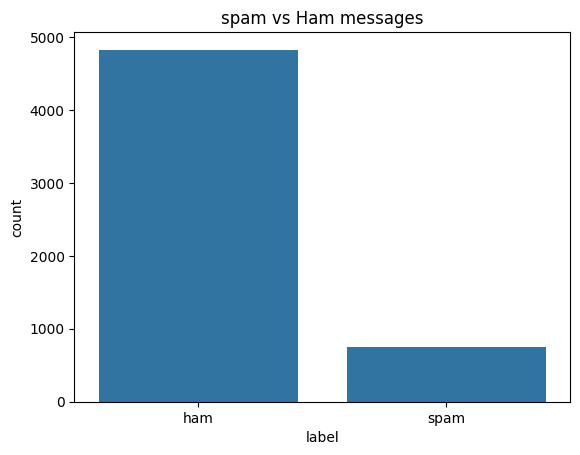

In [7]:
sns.countplot(data=df, x='label')
plt.title("spam vs Ham messages")
plt.show()

In [20]:
import re
import string

In [21]:
def clean_text(text):

  text = text.lower()
  text = re.sub(f'[{re.escape(string.punctuation)}]','', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

In [23]:
#df['clean_message'] = df['message'].apply(clean_text)
df['clean_message'] = df['message'].apply(clean_text)
df[['message','clean_message']].head()

,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [24]:
X = df['clean_message']
Y = df['label'].map({'ham':0, 'spam':1})

In [26]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
print('Train size:',X_train.shape)
print('Test size:',X_test.shape)

Train size: (4457,)
Test size: (1115,)


In [27]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shape:", X_train_tfidf.shape)

TF-IDF matrix shape: (4457, 1291)


In [29]:
model = MultinomialNB()
model.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [31]:
Y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9811659192825112
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



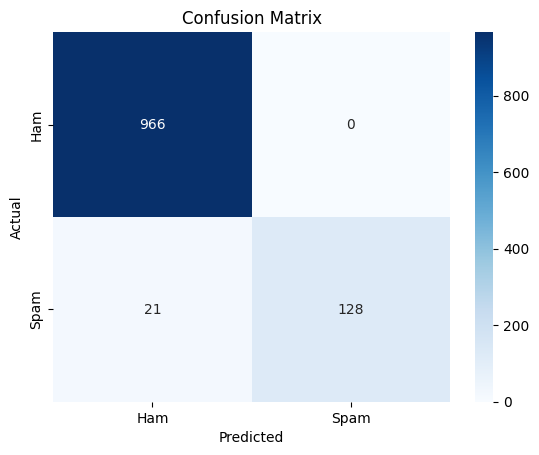

In [33]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()